# 🎯 Naive Bayes Classifier - Probabilistic Classification

**Module 02: Classification Algorithms (Supervised Learning)**

---

## 🎯 Learning Objectives

By the end of this notebook, you will understand:

1. **Bayes' Theorem** - Foundation of probabilistic classification
2. **Naive Assumption** - Why "naive" and its surprising effectiveness
3. **Three Variants** - Gaussian, Multinomial, and Bernoulli NB
4. **Text Classification** - Why NB excels at document classification
5. **Probability Estimates** - Natural confidence scores
6. **Computational Efficiency** - Fast training and prediction
7. **Handling High Dimensions** - Works well with many features

## 📚 Section 1: Theoretical Foundation

### What is Naive Bayes?

**Naive Bayes** is a probabilistic classifier based on **Bayes' Theorem** with the **"naive" assumption** that features are independent.

---

### 🔬 Bayes' Theorem - The Foundation

**Formula:**
```
P(Class|Features) = P(Features|Class) × P(Class) / P(Features)

Posterior = Likelihood × Prior / Evidence
```

**In Classification Context:**
```
P(y|X) = P(X|y) × P(y) / P(X)

where:
• P(y|X) = Posterior probability (what we want)
• P(X|y) = Likelihood (probability of features given class)
• P(y)   = Prior probability (class frequency)
• P(X)   = Evidence (normalization constant)
```

**Example:**
```
P(Spam|"buy now") = P("buy now"|Spam) × P(Spam) / P("buy now")

If:
• P("buy now"|Spam) = 0.8    (80% of spam contains "buy now")
• P(Spam) = 0.3              (30% of emails are spam)
• P("buy now") = 0.4         (40% of all emails contain "buy now")

Then:
P(Spam|"buy now") = 0.8 × 0.3 / 0.4 = 0.6 (60% chance it's spam)
```

---

### 🤔 The "Naive" Assumption

**Assumption:** All features are **conditionally independent** given the class.

**Mathematical Impact:**
```
P(X|y) = P(x₁, x₂, ..., xₙ|y)

Naive Assumption:
P(X|y) = P(x₁|y) × P(x₂|y) × ... × P(xₙ|y)
```

**Why "Naive"?**
- Features are rarely truly independent
- Example: In text, "buy" and "now" often appear together
- Yet, NB works surprisingly well despite this violation!

**Why It Works Anyway:**
- We only need the **relative** probabilities (ranking)
- Decision boundary often remains correct even with wrong probabilities
- Errors in probability estimates can cancel out

**Visual Example:**
```
Email: "buy now cheap"

Without naive assumption (accurate but complex):
P(buy, now, cheap|Spam) = Complex joint probability

With naive assumption (simple but "wrong"):
P(buy|Spam) × P(now|Spam) × P(cheap|Spam) = Easy to compute!

Result: Still correctly classifies as spam!
```

---

### 📊 Three Types of Naive Bayes

#### 1. **Gaussian Naive Bayes** (Continuous Features)
```
Assumes: Features follow normal (Gaussian) distribution

P(xᵢ|y) = (1/√(2πσ²)) × exp(-(xᵢ-μ)²/(2σ²))

Use for: Continuous numerical features (height, weight, temperature)
Example: Iris classification, sensor data
```

#### 2. **Multinomial Naive Bayes** (Count Features)
```
Assumes: Features represent counts or frequencies

P(xᵢ|y) = (count of feature i in class y) / (total count in class y)

Use for: Text classification, word counts, TF-IDF
Example: Spam detection, document categorization
```

#### 3. **Bernoulli Naive Bayes** (Binary Features)
```
Assumes: Features are binary (present/absent)

P(xᵢ|y) = pᵢ if xᵢ=1, else (1-pᵢ)

Use for: Binary feature vectors, presence/absence
Example: Document classification (word present or not)
```

**Comparison Table:**

| **Type** | **Feature Type** | **Distribution** | **Best For** |
|----------|-----------------|-----------------|-------------|
| **Gaussian** | Continuous (real numbers) | Normal distribution | Numerical data |
| **Multinomial** | Discrete counts | Multinomial distribution | Text (word counts) |
| **Bernoulli** | Binary (0/1) | Bernoulli distribution | Binary features |

---

### 🎯 Decision Rule

**Classification Decision:**
```
ŷ = argmax P(y|X)
     y

Choose class with highest posterior probability
```

**Step-by-Step:**
1. Calculate P(y) for each class (prior)
2. Calculate P(X|y) for each class (likelihood)
3. Multiply: P(y) × P(X|y) for each class
4. Choose class with maximum value

**Example (Spam Detection):**
```
Email: "buy cheap pills"

For Spam:
P(Spam) = 0.3
P("buy"|Spam) × P("cheap"|Spam) × P("pills"|Spam) = 0.8 × 0.7 × 0.9 = 0.504
P(Spam|Email) ∝ 0.3 × 0.504 = 0.1512

For Ham:
P(Ham) = 0.7
P("buy"|Ham) × P("cheap"|Ham) × P("pills"|Ham) = 0.2 × 0.1 × 0.05 = 0.001
P(Ham|Email) ∝ 0.7 × 0.001 = 0.0007

Prediction: Spam (0.1512 > 0.0007)
```

---

### 📊 Advantages vs Disadvantages

| **Advantages ✅** | **Disadvantages ❌** |
|------------------|---------------------|
| Fast training (O(n)) | Naive independence assumption |
| Fast prediction | Poor probability estimates |
| Works well with high dimensions | Sensitive to correlated features |
| Handles missing values naturally | Zero-frequency problem |
| Small training data needed | Can't learn feature interactions |
| Natural probability estimates | Assumes same importance for all features |
| Simple, interpretable | Linear decision boundaries only |
| Excellent for text classification | Poor with continuous features (except Gaussian) |

---

### 🎯 When to Use Naive Bayes?

| **Use Naive Bayes When** | **Avoid When** |
|-------------------------|---------------|
| Text classification (spam, sentiment) | Features highly correlated |
| High-dimensional data | Need accurate probabilities |
| Fast training needed | Complex feature interactions |
| Limited training data | Non-linear relationships |
| Need probability estimates | Need best possible accuracy |
| Real-time predictions required | Numerical features (use Gaussian variant) |
| Baseline model needed | Small number of features |

---

### 🚨 The Zero-Frequency Problem

**Problem:**
```
If a word never appears in training for a class:
P("unseen_word"|Class) = 0

Then entire probability becomes 0:
P(Class|Document) = P(Class) × P(word1|Class) × 0 × ... = 0
```

**Solution: Laplace Smoothing (Additive Smoothing)**
```
Without smoothing:
P(word|Class) = count(word in Class) / total_words_in_Class

With smoothing (α=1):
P(word|Class) = (count(word in Class) + α) / (total_words_in_Class + α×vocabulary_size)

Effect: Never get exactly 0, small probability for unseen words
```

## 🔧 Section 2: Setup & Dataset Loading

In [4]:
# Import Essential Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris, load_wine, load_breast_cancer, fetch_20newsgroups
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, classification_report, roc_curve, roc_auc_score
)
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


### 2.1 Gaussian NB: Iris Dataset (Continuous Features)

In [6]:
# Load Iris Dataset
iris = load_iris(as_frame=True)
df_iris = iris.frame

print("📊 Iris Dataset (Gaussian Naive Bayes)")
print(f"Shape: {df_iris.shape}")
print(f"Features: {list(iris.feature_names)}")
print(f"Classes: {iris.target_names.tolist()}")
print(f"\nFeature Types: Continuous (measurements in cm)")
print("\n" + "="*70)
print(df_iris.head())

📊 Iris Dataset (Gaussian Naive Bayes)
Shape: (150, 5)
Features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Classes: ['setosa', 'versicolor', 'virginica']

Feature Types: Continuous (measurements in cm)

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0  


In [9]:
# Split data
X_iris = df_iris.drop('target', axis=1)
y_iris = df_iris['target']

X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(
    X_iris, y_iris, test_size=0.2, random_state=42, stratify=y_iris
)

print(f"\n✂️ Data Split:")
print(f"Training: {X_train_i.shape[0]} samples")
print(f"Testing: {X_test_i.shape[0]} samples")
print(f"Features: {X_train_i.shape[1]}")

print("\n💡 Note: Gaussian NB doesn't require feature scaling!")


✂️ Data Split:
Training: 120 samples
Testing: 30 samples
Features: 4

💡 Note: Gaussian NB doesn't require feature scaling!


### 2.2 Multinomial NB: Text Dataset (20 Newsgroups)

In [12]:
# Load subset of 20 Newsgroups dataset
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', categories=categories, 
                                      remove=('headers', 'footers', 'quotes'),
                                      random_state=42)
newsgroups_test = fetch_20newsgroups(subset='test', categories=categories,
                                     remove=('headers', 'footers', 'quotes'),
                                     random_state=42)

print("\n📊 20 Newsgroups Dataset (Text Classification)")
print(f"Training samples: {len(newsgroups_train.data)}")
print(f"Testing samples: {len(newsgroups_test.data)}")
print(f"Categories: {newsgroups_train.target_names}")
print(f"\nFeature Type: Text (documents)")


📊 20 Newsgroups Dataset (Text Classification)
Training samples: 2034
Testing samples: 1353
Categories: ['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']

Feature Type: Text (documents)


In [14]:
# Show sample documents
print("\n📄 Sample Documents:")
print("="*70)
for i in range(2):
    print(f"\nDocument {i+1} (Category: {newsgroups_train.target_names[newsgroups_train.target[i]]}):")
    print(newsgroups_train.data[i][:200] + "...")
    print("-"*70)


📄 Sample Documents:

Document 1 (Category: comp.graphics):
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and o...
----------------------------------------------------------------------

Document 2 (Category: talk.religion.misc):


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his del...
----------------------------------------------------------------------


### 2.3 Binary Classification: Breast Cancer Dataset

In [17]:
# Load Breast Cancer Dataset
cancer = load_breast_cancer(as_frame=True)
df_cancer = cancer.frame

print("\n📊 Breast Cancer Dataset (Binary Classification)")
print(f"Shape: {df_cancer.shape}")
print(f"Classes: {cancer.target_names.tolist()}")
print(f"Feature Type: Continuous (measurements)")


📊 Breast Cancer Dataset (Binary Classification)
Shape: (569, 31)
Classes: ['malignant', 'benign']
Feature Type: Continuous (measurements)


In [19]:
# Split data
X_cancer = df_cancer.drop('target', axis=1)
y_cancer = df_cancer['target']

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42, stratify=y_cancer
)

print(f"\n✂️ Data Split:")
print(f"Training: {X_train_c.shape[0]} samples")
print(f"Testing: {X_test_c.shape[0]} samples")


✂️ Data Split:
Training: 455 samples
Testing: 114 samples


## 🧪 Section 3: Gaussian Naive Bayes (Continuous Features)

### 3.1 Training Gaussian NB on Iris

In [24]:
# Train Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_i, y_train_i)

# Predictions
y_pred_gnb = gnb.predict(X_test_i)
y_pred_proba_gnb = gnb.predict_proba(X_test_i)

# Evaluate
gnb_accuracy = accuracy_score(y_test_i, y_pred_gnb)

print("📊 Gaussian Naive Bayes Performance (Iris):")
print(f"Accuracy: {gnb_accuracy:.4f}")

📊 Gaussian Naive Bayes Performance (Iris):
Accuracy: 0.9667


In [26]:
# Show probability predictions
print("\n🔍 Sample Predictions with Probabilities:")
print("="*70)
for i in range(5):
    actual = y_test_i.iloc[i]
    pred = y_pred_gnb[i]
    probs = y_pred_proba_gnb[i]
    
    print(f"\nSample {i+1}:")
    print(f"  Actual: {iris.target_names[actual]}")
    print(f"  Predicted: {iris.target_names[pred]}")
    print(f"  Probabilities:")
    for j, class_name in enumerate(iris.target_names):
        print(f"    {class_name:15}: {probs[j]:.4f}")
    print(f"  {'✅ Correct' if actual == pred else '❌ Wrong'}")


🔍 Sample Predictions with Probabilities:

Sample 1:
  Actual: setosa
  Predicted: setosa
  Probabilities:
    setosa         : 1.0000
    versicolor     : 0.0000
    virginica      : 0.0000
  ✅ Correct

Sample 2:
  Actual: virginica
  Predicted: virginica
  Probabilities:
    setosa         : 0.0000
    versicolor     : 0.0877
    virginica      : 0.9123
  ✅ Correct

Sample 3:
  Actual: versicolor
  Predicted: versicolor
  Probabilities:
    setosa         : 0.0000
    versicolor     : 1.0000
    virginica      : 0.0000
  ✅ Correct

Sample 4:
  Actual: versicolor
  Predicted: versicolor
  Probabilities:
    setosa         : 0.0000
    versicolor     : 1.0000
    virginica      : 0.0000
  ✅ Correct

Sample 5:
  Actual: setosa
  Predicted: setosa
  Probabilities:
    setosa         : 1.0000
    versicolor     : 0.0000
    virginica      : 0.0000
  ✅ Correct


### 3.2 Understanding Gaussian Distribution Parameters

In [29]:
# Extract learned parameters (mean and variance for each class)
print("\n📊 Learned Gaussian Parameters:")
print("="*70)

for class_idx, class_name in enumerate(iris.target_names):
    print(f"\n{class_name}:")
    print(f"  Class prior: {gnb.class_prior_[class_idx]:.4f}")
    print(f"  Feature means:")
    for feat_idx, feat_name in enumerate(iris.feature_names):
        mean = gnb.theta_[class_idx, feat_idx]
        var = gnb.var_[class_idx, feat_idx]
        print(f"    {feat_name:25}: μ={mean:.2f}, σ²={var:.2f}")


📊 Learned Gaussian Parameters:

setosa:
  Class prior: 0.3333
  Feature means:
    sepal length (cm)        : μ=4.99, σ²=0.09
    sepal width (cm)         : μ=3.41, σ²=0.16
    petal length (cm)        : μ=1.48, σ²=0.03
    petal width (cm)         : μ=0.25, σ²=0.01

versicolor:
  Class prior: 0.3333
  Feature means:
    sepal length (cm)        : μ=5.93, σ²=0.22
    sepal width (cm)         : μ=2.75, σ²=0.09
    petal length (cm)        : μ=4.25, σ²=0.19
    petal width (cm)         : μ=1.32, σ²=0.03

virginica:
  Class prior: 0.3333
  Feature means:
    sepal length (cm)        : μ=6.61, σ²=0.46
    sepal width (cm)         : μ=2.98, σ²=0.12
    petal length (cm)        : μ=5.58, σ²=0.32
    petal width (cm)         : μ=2.04, σ²=0.07


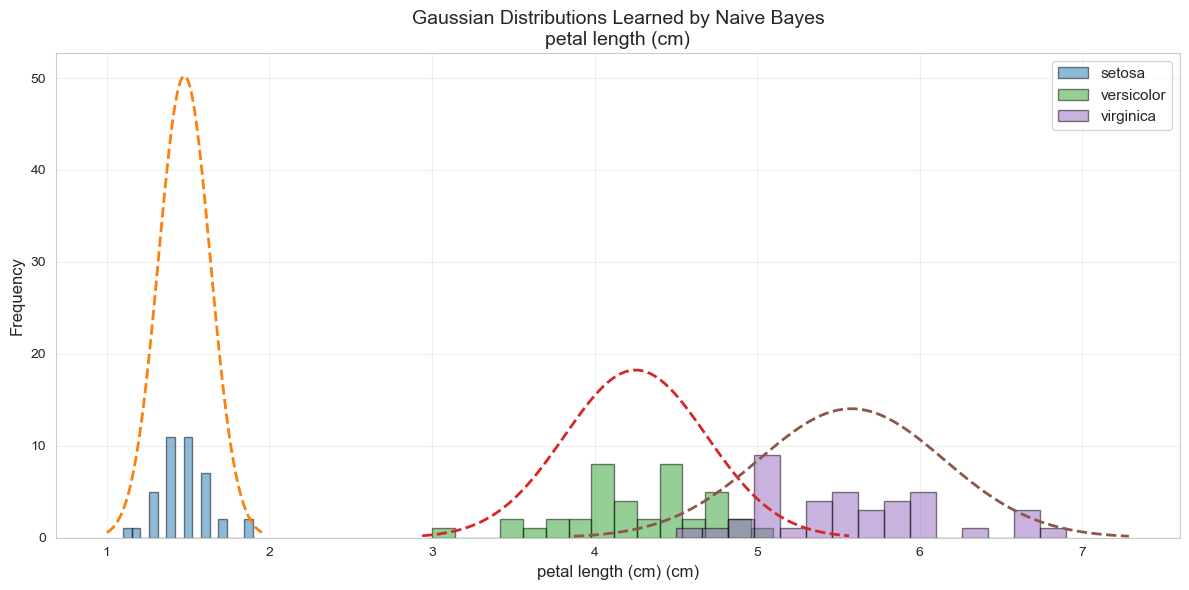

In [31]:
# Visualize distributions for one feature
feature_idx = 2  # Petal length
feature_name = iris.feature_names[feature_idx]

plt.figure(figsize=(12, 6))

for class_idx, class_name in enumerate(iris.target_names):
    # Get data for this class
    class_data = X_train_i[y_train_i == class_idx][feature_name]
    
    # Plot histogram
    plt.hist(class_data, bins=15, alpha=0.5, label=class_name, edgecolor='black')
    
    # Plot learned Gaussian
    mean = gnb.theta_[class_idx, feature_idx]
    std = np.sqrt(gnb.var_[class_idx, feature_idx])
    x = np.linspace(mean - 3*std, mean + 3*std, 100)
    
    # Scale to match histogram
    density = (1 / (std * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mean) / std) ** 2)
    density_scaled = density * len(class_data) * 0.5  # Scale factor
    
    plt.plot(x, density_scaled, linewidth=2, linestyle='--')

plt.xlabel(f'{feature_name} (cm)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title(f'Gaussian Distributions Learned by Naive Bayes\n{feature_name}', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 3.3 Confusion Matrix

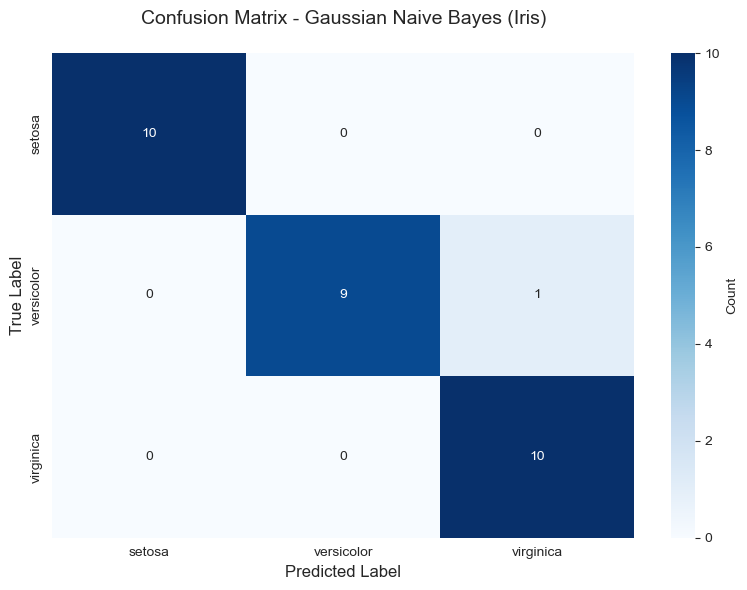

In [34]:
# Confusion matrix
cm_gnb = confusion_matrix(y_test_i, y_pred_gnb)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_gnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=iris.target_names,
            yticklabels=iris.target_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix - Gaussian Naive Bayes (Iris)\n', fontsize=14)
plt.tight_layout()
plt.show()

In [36]:
# Classification report
print("\n📊 Classification Report:")
print("="*70)
print(classification_report(y_test_i, y_pred_gnb, target_names=iris.target_names))


📊 Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.90      0.95        10
   virginica       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## 📊 Section 4: Multinomial Naive Bayes (Text Classification)

### 4.1 Text Vectorization

In [40]:
# Convert text to count vectors
vectorizer = CountVectorizer(max_features=5000, min_df=2, max_df=0.8)
X_train_counts = vectorizer.fit_transform(newsgroups_train.data)
X_test_counts = vectorizer.transform(newsgroups_test.data)

print("📊 Text Vectorization:")
print(f"Vocabulary size: {len(vectorizer.get_feature_names_out())}")
print(f"Training matrix shape: {X_train_counts.shape}")
print(f"Testing matrix shape: {X_test_counts.shape}")
print(f"Matrix sparsity: {(1 - X_train_counts.nnz / (X_train_counts.shape[0] * X_train_counts.shape[1])):.2%}")

📊 Text Vectorization:
Vocabulary size: 5000
Training matrix shape: (2034, 5000)
Testing matrix shape: (1353, 5000)
Matrix sparsity: 98.44%


In [42]:
# Show sample words
print("\n📝 Sample Vocabulary (first 20 words):")
print(vectorizer.get_feature_names_out()[:20])


📝 Sample Vocabulary (first 20 words):
['00' '000' '01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '100' '1000'
 '101' '102' '11' '111' '12' '120']


### 4.2 Training Multinomial NB

In [46]:
# Train Multinomial Naive Bayes
mnb = MultinomialNB(alpha=1.0)  # alpha=1.0 is Laplace smoothing
mnb.fit(X_train_counts, newsgroups_train.target)

# Predictions
y_pred_mnb = mnb.predict(X_test_counts)
y_pred_proba_mnb = mnb.predict_proba(X_test_counts)

# Evaluate
mnb_accuracy = accuracy_score(newsgroups_test.target, y_pred_mnb)
mnb_f1 = f1_score(newsgroups_test.target, y_pred_mnb, average='weighted')

print("📊 Multinomial Naive Bayes Performance (Text):")
print(f"Accuracy: {mnb_accuracy:.4f}")
print(f"F1 Score (weighted): {mnb_f1:.4f}")

📊 Multinomial Naive Bayes Performance (Text):
Accuracy: 0.7576
F1 Score (weighted): 0.7589


In [48]:
# Sample predictions
print("\n🔍 Sample Text Classifications:")
print("="*70)

for i in range(3):
    actual_idx = newsgroups_test.target[i]
    pred_idx = y_pred_mnb[i]
    probs = y_pred_proba_mnb[i]
    
    print(f"\nDocument {i+1}:")
    print(f"Text: {newsgroups_test.data[i][:150]}...")
    print(f"\nActual: {newsgroups_test.target_names[actual_idx]}")
    print(f"Predicted: {newsgroups_test.target_names[pred_idx]}")
    print(f"Probabilities:")
    for j, class_name in enumerate(newsgroups_test.target_names):
        print(f"  {class_name:25}: {probs[j]:.4f}")
    print(f"{'✅ Correct' if actual_idx == pred_idx else '❌ Wrong'}")
    print("-"*70)


🔍 Sample Text Classifications:

Document 1:
Text: TRry the SKywatch project in  Arizona....

Actual: sci.space
Predicted: sci.space
Probabilities:
  alt.atheism              : 0.0063
  comp.graphics            : 0.1531
  sci.space                : 0.8361
  talk.religion.misc       : 0.0044
✅ Correct
----------------------------------------------------------------------

Document 2:
Text: The Vatican library recently made a tour of the US.
 Can anyone help me in finding a FTP site where this collection is 
 available....

Actual: comp.graphics
Predicted: comp.graphics
Probabilities:
  alt.atheism              : 0.0000
  comp.graphics            : 0.9973
  sci.space                : 0.0027
  talk.religion.misc       : 0.0000
✅ Correct
----------------------------------------------------------------------

Document 3:
Text: Hi there,

I am here looking for some help.

My friend is a interior decor designer. He is from Thailand. He is
trying to find some graphics software ...

Actual: com

### 4.3 Most Informative Features

In [51]:
# Find most informative words for each class
feature_names = vectorizer.get_feature_names_out()

print("\n📊 Most Informative Words Per Category:")
print("="*70)

for class_idx, class_name in enumerate(newsgroups_train.target_names):
    # Get log probabilities for this class
    log_probs = mnb.feature_log_prob_[class_idx]
    
    # Get top 10 words
    top_indices = np.argsort(log_probs)[-10:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    top_probs = [np.exp(log_probs[i]) for i in top_indices]
    
    print(f"\n{class_name}:")
    for word, prob in zip(top_words, top_probs):
        print(f"  {word:15}: {prob:.6f}")


📊 Most Informative Words Per Category:

alt.atheism:
  of             : 0.032295
  to             : 0.032210
  is             : 0.026616
  that           : 0.024234
  and            : 0.020557
  in             : 0.017675
  it             : 0.017479
  you            : 0.013717
  not            : 0.011958
  be             : 0.009821

comp.graphics:
  to             : 0.027117
  and            : 0.024781
  of             : 0.022052
  is             : 0.017783
  for            : 0.015914
  in             : 0.014462
  it             : 0.014070
  you            : 0.010862
  that           : 0.009751
  on             : 0.009207

sci.space:
  of             : 0.029545
  to             : 0.028430
  and            : 0.025922
  in             : 0.018200
  is             : 0.015116
  for            : 0.012787
  that           : 0.011334
  it             : 0.010787
  on             : 0.010200
  space          : 0.009852

talk.religion.misc:
  of             : 0.035458
  to             : 0.032526
 

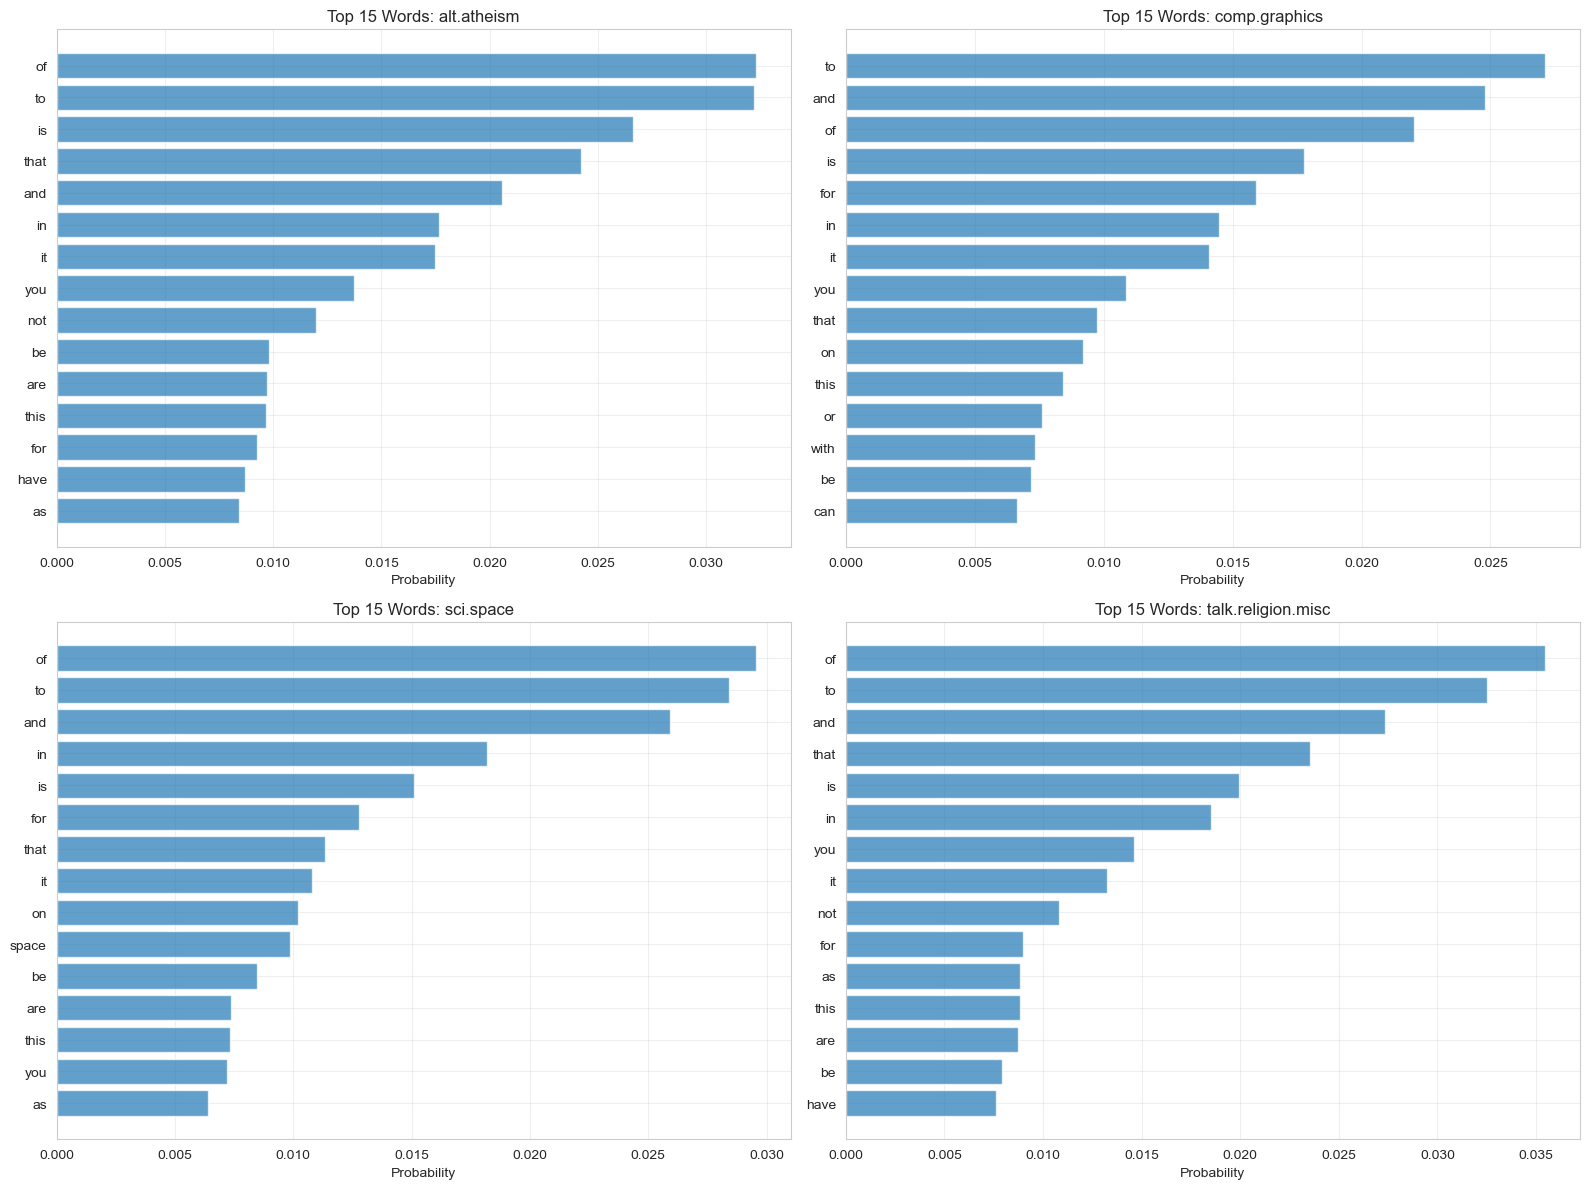

In [53]:
# Visualize top words for each category
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for class_idx, class_name in enumerate(newsgroups_train.target_names):
    ax = axes[class_idx]
    
    # Get log probabilities
    log_probs = mnb.feature_log_prob_[class_idx]
    
    # Get top 15 words
    top_indices = np.argsort(log_probs)[-15:][::-1]
    top_words = [feature_names[i] for i in top_indices]
    top_probs = [np.exp(log_probs[i]) for i in top_indices]
    
    # Plot
    ax.barh(range(15), top_probs[::-1], alpha=0.7)
    ax.set_yticks(range(15))
    ax.set_yticklabels(top_words[::-1])
    ax.set_xlabel('Probability')
    ax.set_title(f'Top 15 Words: {class_name}')
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 4.4 Confusion Matrix (Text)

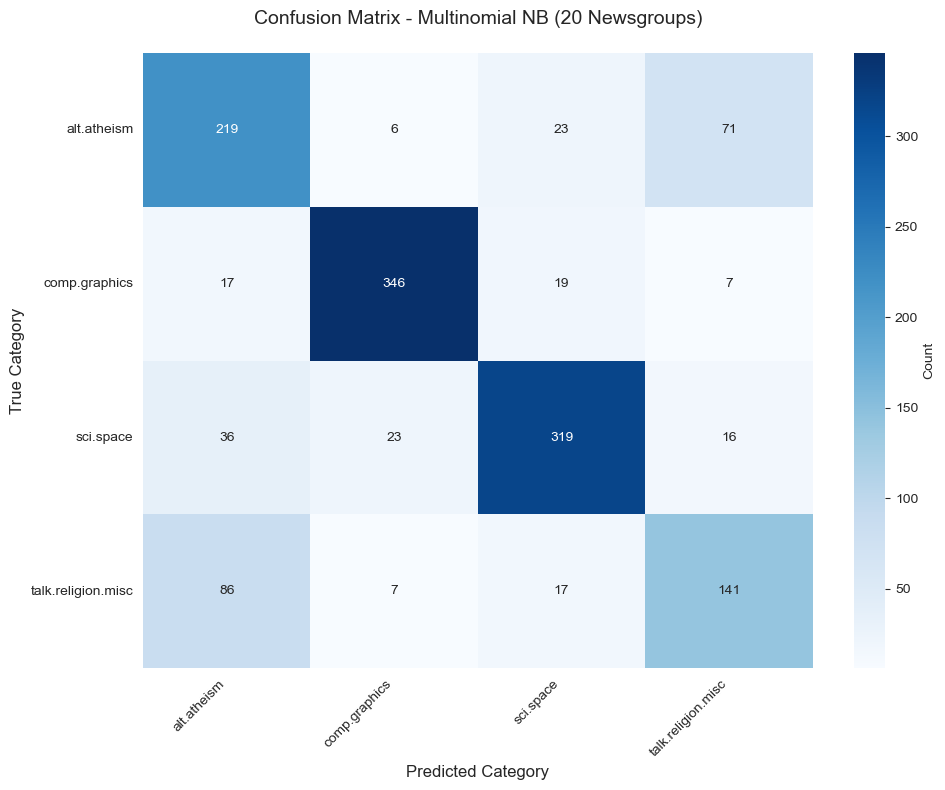

In [56]:
# Confusion matrix for text classification
cm_mnb = confusion_matrix(newsgroups_test.target, y_pred_mnb)

plt.figure(figsize=(10, 8))
sns.heatmap(cm_mnb, annot=True, fmt='d', cmap='Blues',
            xticklabels=newsgroups_test.target_names,
            yticklabels=newsgroups_test.target_names,
            cbar_kws={'label': 'Count'})
plt.xlabel('Predicted Category', fontsize=12)
plt.ylabel('True Category', fontsize=12)
plt.title('Confusion Matrix - Multinomial NB (20 Newsgroups)\n', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [58]:
# Classification report
print("\n📊 Detailed Classification Report:")
print("="*70)
print(classification_report(newsgroups_test.target, y_pred_mnb, 
                          target_names=newsgroups_test.target_names))


📊 Detailed Classification Report:
                    precision    recall  f1-score   support

       alt.atheism       0.61      0.69      0.65       319
     comp.graphics       0.91      0.89      0.90       389
         sci.space       0.84      0.81      0.83       394
talk.religion.misc       0.60      0.56      0.58       251

          accuracy                           0.76      1353
         macro avg       0.74      0.74      0.74      1353
      weighted avg       0.76      0.76      0.76      1353



### 4.5 Impact of Smoothing Parameter (Alpha)

In [61]:
# Test different alpha values
alphas = [0.01, 0.1, 0.5, 1.0, 2.0, 5.0, 10.0]
alpha_results = []

print("\n🔍 Testing Different Smoothing Values (Alpha):")
print("="*70)

for alpha in alphas:
    mnb_temp = MultinomialNB(alpha=alpha)
    mnb_temp.fit(X_train_counts, newsgroups_train.target)
    
    test_acc = mnb_temp.score(X_test_counts, newsgroups_test.target)
    
    alpha_results.append({
        'Alpha': alpha,
        'Test Accuracy': test_acc
    })
    
    print(f"Alpha={alpha:>5.2f} → Accuracy={test_acc:.4f}")

alpha_df = pd.DataFrame(alpha_results)


🔍 Testing Different Smoothing Values (Alpha):
Alpha= 0.01 → Accuracy=0.7627
Alpha= 0.10 → Accuracy=0.7635
Alpha= 0.50 → Accuracy=0.7620
Alpha= 1.00 → Accuracy=0.7576
Alpha= 2.00 → Accuracy=0.7480
Alpha= 5.00 → Accuracy=0.7361
Alpha=10.00 → Accuracy=0.7036


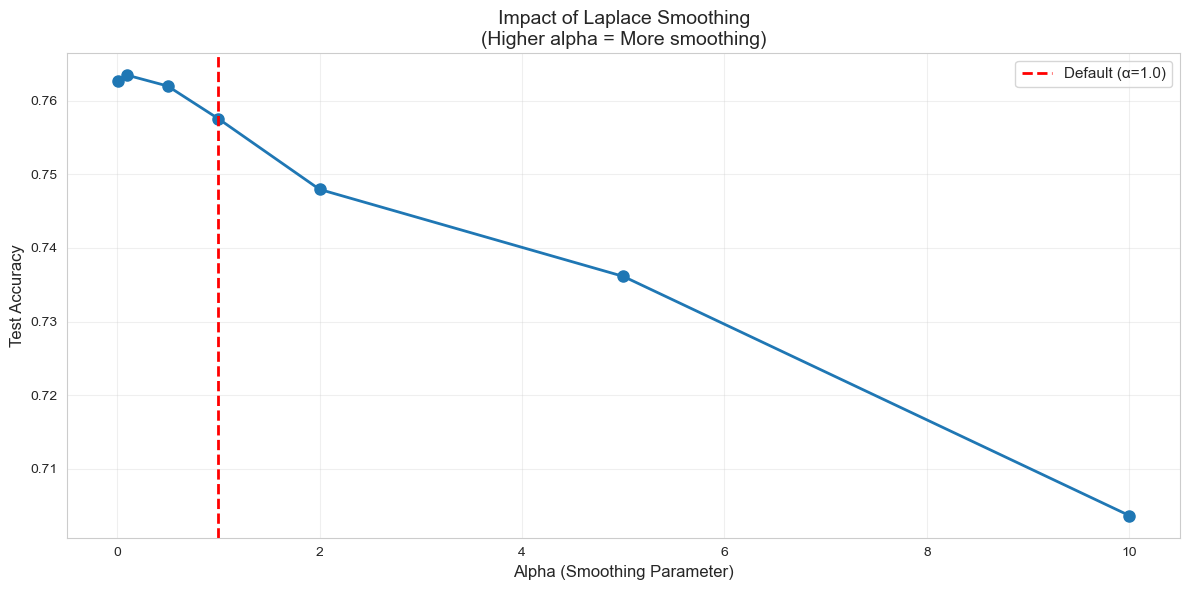


💡 Alpha Effect:
  • Low alpha (0.01): Minimal smoothing, trusts training data
  • Alpha = 1.0: Laplace smoothing (add-one smoothing)
  • High alpha (10): Heavy smoothing, uniform distribution


In [63]:
# Visualize alpha impact
plt.figure(figsize=(12, 6))
plt.plot(alpha_df['Alpha'], alpha_df['Test Accuracy'], marker='o', 
         linewidth=2, markersize=8)
plt.axvline(x=1.0, color='red', linestyle='--', label='Default (α=1.0)', linewidth=2)
plt.xlabel('Alpha (Smoothing Parameter)', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title('Impact of Laplace Smoothing\n(Higher alpha = More smoothing)', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Alpha Effect:")
print("  • Low alpha (0.01): Minimal smoothing, trusts training data")
print("  • Alpha = 1.0: Laplace smoothing (add-one smoothing)")
print("  • High alpha (10): Heavy smoothing, uniform distribution")

## 📊 Section 5: Bernoulli Naive Bayes (Binary Features)

### 5.1 Binary Feature Extraction

In [67]:
# Convert text to binary features (word present/absent)
binary_vectorizer = CountVectorizer(max_features=5000, binary=True, min_df=2, max_df=0.8)
X_train_binary = binary_vectorizer.fit_transform(newsgroups_train.data)
X_test_binary = binary_vectorizer.transform(newsgroups_test.data)

print("📊 Binary Feature Extraction:")
print(f"Vocabulary size: {len(binary_vectorizer.get_feature_names_out())}")
print(f"Training matrix shape: {X_train_binary.shape}")
print(f"Values: Only 0 (absent) or 1 (present)")

📊 Binary Feature Extraction:
Vocabulary size: 5000
Training matrix shape: (2034, 5000)
Values: Only 0 (absent) or 1 (present)


### 5.2 Training Bernoulli NB

In [70]:
# Train Bernoulli Naive Bayes
bnb = BernoulliNB(alpha=1.0)
bnb.fit(X_train_binary, newsgroups_train.target)

# Predictions
y_pred_bnb = bnb.predict(X_test_binary)

# Evaluate
bnb_accuracy = accuracy_score(newsgroups_test.target, y_pred_bnb)
bnb_f1 = f1_score(newsgroups_test.target, y_pred_bnb, average='weighted')

print("📊 Bernoulli Naive Bayes Performance (Binary Features):")
print(f"Accuracy: {bnb_accuracy:.4f}")
print(f"F1 Score (weighted): {bnb_f1:.4f}")

📊 Bernoulli Naive Bayes Performance (Binary Features):
Accuracy: 0.5883
F1 Score (weighted): 0.5747


### 5.3 Comparing All Three Variants

In [73]:
# Train Gaussian NB on Cancer dataset
gnb_cancer = GaussianNB()
gnb_cancer.fit(X_train_c, y_train_c)

# Create comparison
variant_comparison = pd.DataFrame({
    'Variant': [
        'Gaussian NB',
        'Multinomial NB',
        'Bernoulli NB'
    ],
    'Dataset': [
        'Iris (continuous)',
        '20 Newsgroups (counts)',
        '20 Newsgroups (binary)'
    ],
    'Accuracy': [
        gnb_accuracy,
        mnb_accuracy,
        bnb_accuracy
    ],
    'Feature Type': [
        'Continuous',
        'Count/Frequency',
        'Binary (0/1)'
    ],
    'Best For': [
        'Numerical measurements',
        'Text (word counts)',
        'Presence/absence'
    ]
})

print("\n📊 NAIVE BAYES VARIANTS COMPARISON:")
print("="*70)
print(variant_comparison.to_string(index=False))


📊 NAIVE BAYES VARIANTS COMPARISON:
       Variant                Dataset  Accuracy    Feature Type               Best For
   Gaussian NB      Iris (continuous)  0.966667      Continuous Numerical measurements
Multinomial NB 20 Newsgroups (counts)  0.757576 Count/Frequency     Text (word counts)
  Bernoulli NB 20 Newsgroups (binary)  0.588322    Binary (0/1)       Presence/absence


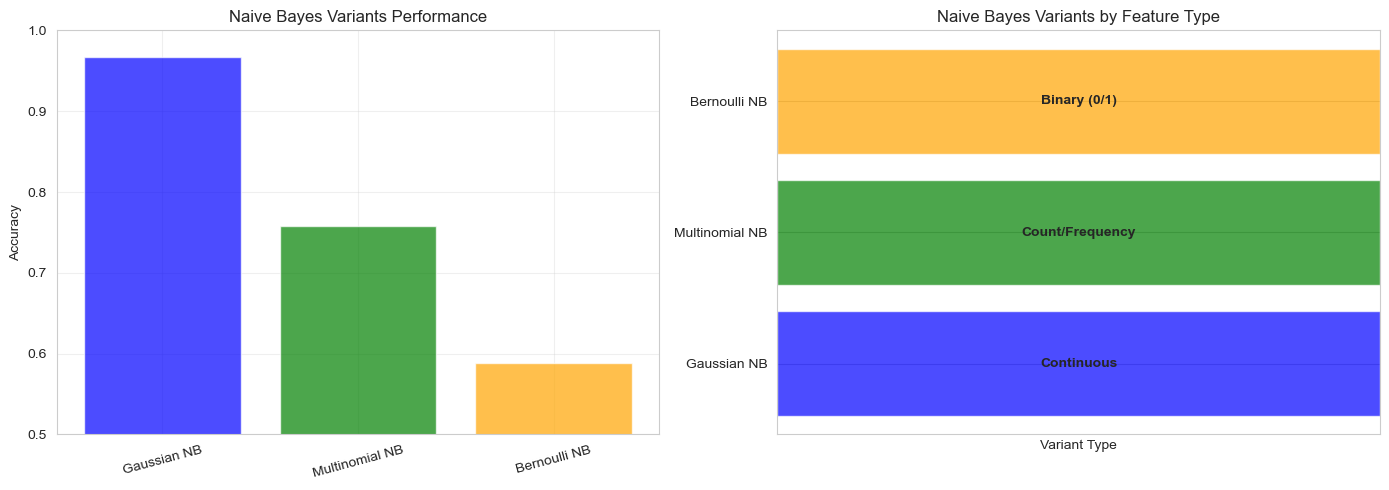

In [75]:
# Visualize comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Accuracy
axes[0].bar(variant_comparison['Variant'], variant_comparison['Accuracy'], 
           alpha=0.7, color=['blue', 'green', 'orange'])
axes[0].set_ylabel('Accuracy')
axes[0].set_title('Naive Bayes Variants Performance')
axes[0].set_ylim([0.5, 1.0])
axes[0].tick_params(axis='x', rotation=15)
axes[0].grid(True, alpha=0.3)

# Feature type illustration
feature_types = variant_comparison['Feature Type'].tolist()
axes[1].barh(variant_comparison['Variant'], [1, 1, 1], alpha=0.7, 
            color=['blue', 'green', 'orange'])
axes[1].set_xlabel('Variant Type')
axes[1].set_title('Naive Bayes Variants by Feature Type')
for i, (variant, ftype) in enumerate(zip(variant_comparison['Variant'], feature_types)):
    axes[1].text(0.5, i, ftype, ha='center', va='center', fontsize=10, fontweight='bold')
axes[1].set_xlim([0, 1])
axes[1].set_xticks([])

plt.tight_layout()
plt.show()

## 📊 Section 6: Model Comparison & Evaluation

### 6.1 Comparing NB with Other Classifiers

In [79]:
# Train other classifiers on text data for comparison
print("\n🔍 Training comparison models on text data...")

# Logistic Regression
lr_text = LogisticRegression(random_state=42, max_iter=1000)
lr_text.fit(X_train_counts, newsgroups_train.target)

# Decision Tree
dt_text = DecisionTreeClassifier(max_depth=10, random_state=42)
dt_text.fit(X_train_counts.toarray(), newsgroups_train.target)  # Convert to dense

# Create comparison
text_comparison = pd.DataFrame({
    'Model': [
        'Multinomial NB',
        'Bernoulli NB',
        'Logistic Regression',
        'Decision Tree'
    ],
    'Accuracy': [
        mnb_accuracy,
        bnb_accuracy,
        lr_text.score(X_test_counts, newsgroups_test.target),
        dt_text.score(X_test_counts.toarray(), newsgroups_test.target)
    ],
    'Training Speed': [
        'Very Fast',
        'Very Fast',
        'Medium',
        'Fast'
    ],
    'Prediction Speed': [
        'Very Fast',
        'Very Fast',
        'Fast',
        'Fast'
    ]
})

print("\n📊 MODEL COMPARISON (Text Classification):")
print("="*70)
print(text_comparison.to_string(index=False))


🔍 Training comparison models on text data...

📊 MODEL COMPARISON (Text Classification):
              Model  Accuracy Training Speed Prediction Speed
     Multinomial NB  0.757576      Very Fast        Very Fast
       Bernoulli NB  0.588322      Very Fast        Very Fast
Logistic Regression  0.700665         Medium             Fast
      Decision Tree  0.490761           Fast             Fast


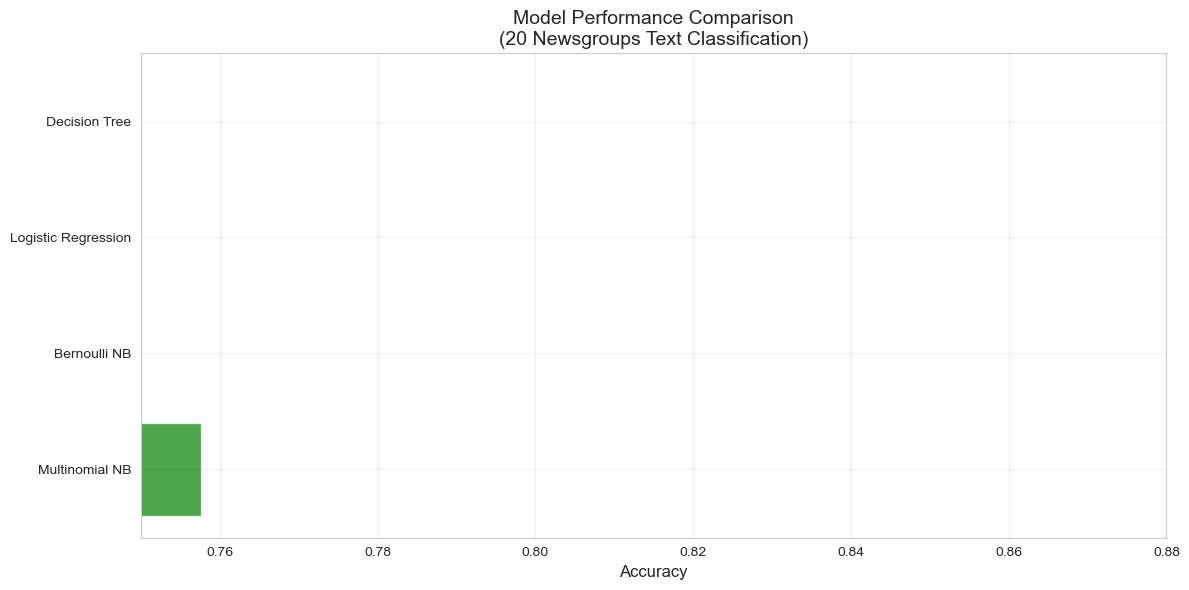

In [81]:
# Visualize comparison
plt.figure(figsize=(12, 6))
colors = ['green', 'orange', 'blue', 'purple']
plt.barh(text_comparison['Model'], text_comparison['Accuracy'], alpha=0.7, color=colors)
plt.xlabel('Accuracy', fontsize=12)
plt.title('Model Performance Comparison\n(20 Newsgroups Text Classification)', fontsize=14)
plt.xlim([0.75, 0.88])
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 6.2 Training Time Comparison

In [84]:
# Compare training time
import time

print("\n⏱️  Training Time Comparison:")
print("="*70)

# Naive Bayes
start = time.time()
mnb_temp = MultinomialNB()
mnb_temp.fit(X_train_counts, newsgroups_train.target)
nb_time = time.time() - start

# Logistic Regression
start = time.time()
lr_temp = LogisticRegression(random_state=42, max_iter=100)
lr_temp.fit(X_train_counts, newsgroups_train.target)
lr_time = time.time() - start

# Decision Tree
start = time.time()
dt_temp = DecisionTreeClassifier(random_state=42)
dt_temp.fit(X_train_counts.toarray(), newsgroups_train.target)
dt_time = time.time() - start

print(f"Naive Bayes:          {nb_time:.4f} seconds")
print(f"Logistic Regression:  {lr_time:.4f} seconds ({lr_time/nb_time:.1f}x slower)")
print(f"Decision Tree:        {dt_time:.4f} seconds ({dt_time/nb_time:.1f}x slower)")

print("\n💡 Naive Bayes is extremely fast due to simple probability calculations!")


⏱️  Training Time Comparison:
Naive Bayes:          0.0080 seconds
Logistic Regression:  0.4700 seconds (58.7x slower)
Decision Tree:        1.4320 seconds (178.9x slower)

💡 Naive Bayes is extremely fast due to simple probability calculations!


### 6.3 Probability Calibration Analysis

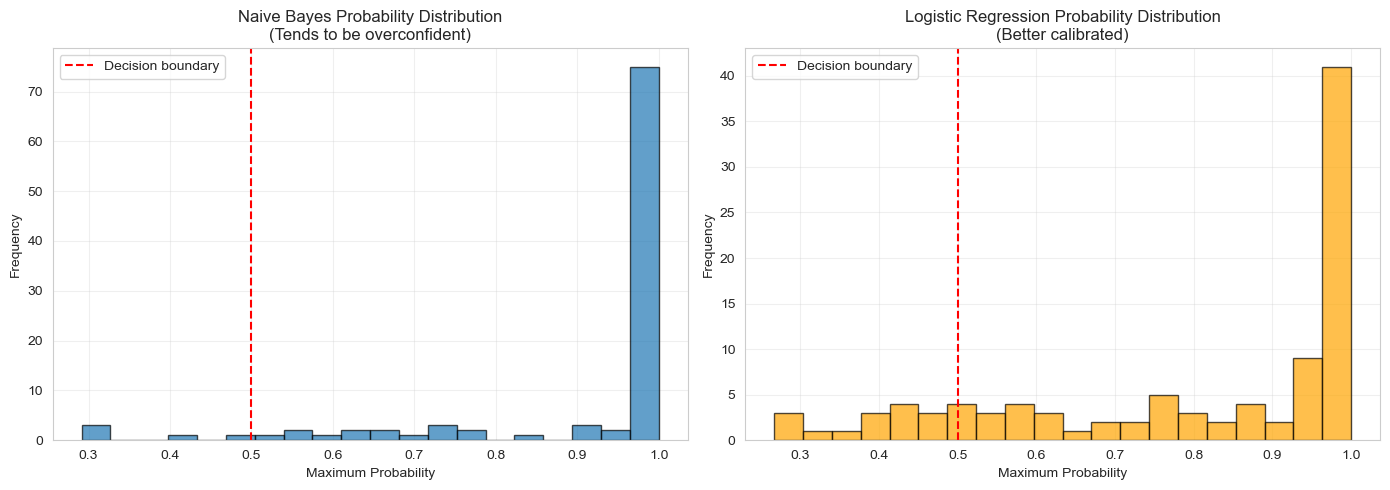


📊 Probability Analysis:
NB Mean max probability: 0.9146
LR Mean max probability: 0.7940

⚠️  Naive Bayes probabilities are often too extreme (overconfident)
Use sklearn.calibration.CalibratedClassifierCV if accurate probabilities needed


In [87]:
# Check probability calibration
# Naive Bayes tends to give extreme probabilities (very confident)

sample_probs_nb = y_pred_proba_mnb[:100]
sample_probs_lr = lr_text.predict_proba(X_test_counts[:100])

# Plot probability distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Naive Bayes
max_probs_nb = np.max(sample_probs_nb, axis=1)
axes[0].hist(max_probs_nb, bins=20, alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Maximum Probability')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Naive Bayes Probability Distribution\n(Tends to be overconfident)')
axes[0].axvline(x=0.5, color='r', linestyle='--', label='Decision boundary')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Logistic Regression
max_probs_lr = np.max(sample_probs_lr, axis=1)
axes[1].hist(max_probs_lr, bins=20, alpha=0.7, edgecolor='black', color='orange')
axes[1].set_xlabel('Maximum Probability')
axes[1].set_ylabel('Frequency')
axes[1].set_title('Logistic Regression Probability Distribution\n(Better calibrated)')
axes[1].axvline(x=0.5, color='r', linestyle='--', label='Decision boundary')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Probability Analysis:")
print(f"NB Mean max probability: {np.mean(max_probs_nb):.4f}")
print(f"LR Mean max probability: {np.mean(max_probs_lr):.4f}")
print("\n⚠️  Naive Bayes probabilities are often too extreme (overconfident)")
print("Use sklearn.calibration.CalibratedClassifierCV if accurate probabilities needed")

## 🚀 Section 7: Production & Advanced Topics

### 7.1 Production-Ready Pipeline

In [91]:
# Build complete text classification pipeline
text_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=5000, min_df=2, max_df=0.8)),
    ('classifier', MultinomialNB(alpha=1.0))
])

# Train pipeline
text_pipeline.fit(newsgroups_train.data, newsgroups_train.target)

# Evaluate
pipeline_accuracy = text_pipeline.score(newsgroups_test.data, newsgroups_test.target)

print("🚀 Production Pipeline Performance:")
print(f"Accuracy: {pipeline_accuracy:.4f}")

🚀 Production Pipeline Performance:
Accuracy: 0.7576


In [93]:
# Test on new documents
new_docs = [
    "NASA launched a new satellite into space yesterday",
    "The graphics card performs 3D rendering very well",
    "I believe in science and evidence-based reasoning",
    "Religious texts have influenced many cultures"
]

predictions = text_pipeline.predict(new_docs)
probabilities = text_pipeline.predict_proba(new_docs)

print("\n🔍 Predictions on New Documents:")
print("="*70)
for doc, pred, probs in zip(new_docs, predictions, probabilities):
    print(f"\nDocument: {doc}")
    print(f"Predicted: {newsgroups_train.target_names[pred]}")
    print(f"Probabilities:")
    for i, class_name in enumerate(newsgroups_train.target_names):
        print(f"  {class_name:25}: {probs[i]:.4f}")
    print("-"*70)


🔍 Predictions on New Documents:

Document: NASA launched a new satellite into space yesterday
Predicted: sci.space
Probabilities:
  alt.atheism              : 0.0000
  comp.graphics            : 0.0000
  sci.space                : 1.0000
  talk.religion.misc       : 0.0000
----------------------------------------------------------------------

Document: The graphics card performs 3D rendering very well
Predicted: comp.graphics
Probabilities:
  alt.atheism              : 0.0000
  comp.graphics            : 1.0000
  sci.space                : 0.0000
  talk.religion.misc       : 0.0000
----------------------------------------------------------------------

Document: I believe in science and evidence-based reasoning
Predicted: alt.atheism
Probabilities:
  alt.atheism              : 0.8841
  comp.graphics            : 0.0001
  sci.space                : 0.0043
  talk.religion.misc       : 0.1115
----------------------------------------------------------------------

Document: Religious tex

In [95]:
# Save pipeline
import joblib

joblib.dump(text_pipeline, 'naive_bayes_text_pipeline.pkl')
print("\n💾 Pipeline saved as 'naive_bayes_text_pipeline.pkl'")

# Test loading
loaded_pipeline = joblib.load('naive_bayes_text_pipeline.pkl')
test_doc = ["This is a test document about space exploration"]
test_pred = loaded_pipeline.predict(test_doc)

print(f"\n🧪 Testing Loaded Pipeline:")
print(f"Document: {test_doc[0]}")
print(f"Prediction: {newsgroups_train.target_names[test_pred[0]]}")
print("✅ Pipeline works correctly!")


💾 Pipeline saved as 'naive_bayes_text_pipeline.pkl'

🧪 Testing Loaded Pipeline:
Document: This is a test document about space exploration
Prediction: sci.space
✅ Pipeline works correctly!


### 7.2 Cross-Validation Analysis

In [98]:
# Detailed cross-validation on Iris
cv_scores = cross_val_score(
    GaussianNB(),
    X_iris,
    y_iris,
    cv=10,
    scoring='accuracy'
)

print("\n🔄 10-Fold Cross-Validation Results (Gaussian NB on Iris):")
print("="*70)
print(f"CV Scores: {cv_scores}")
print(f"\nMean Accuracy: {cv_scores.mean():.4f}")
print(f"Std Dev:       {cv_scores.std():.4f}")
print(f"Min:           {cv_scores.min():.4f}")
print(f"Max:           {cv_scores.max():.4f}")


🔄 10-Fold Cross-Validation Results (Gaussian NB on Iris):
CV Scores: [0.93333333 0.93333333 1.         0.93333333 0.93333333 0.93333333
 0.86666667 1.         1.         1.        ]

Mean Accuracy: 0.9533
Std Dev:       0.0427
Min:           0.8667
Max:           1.0000


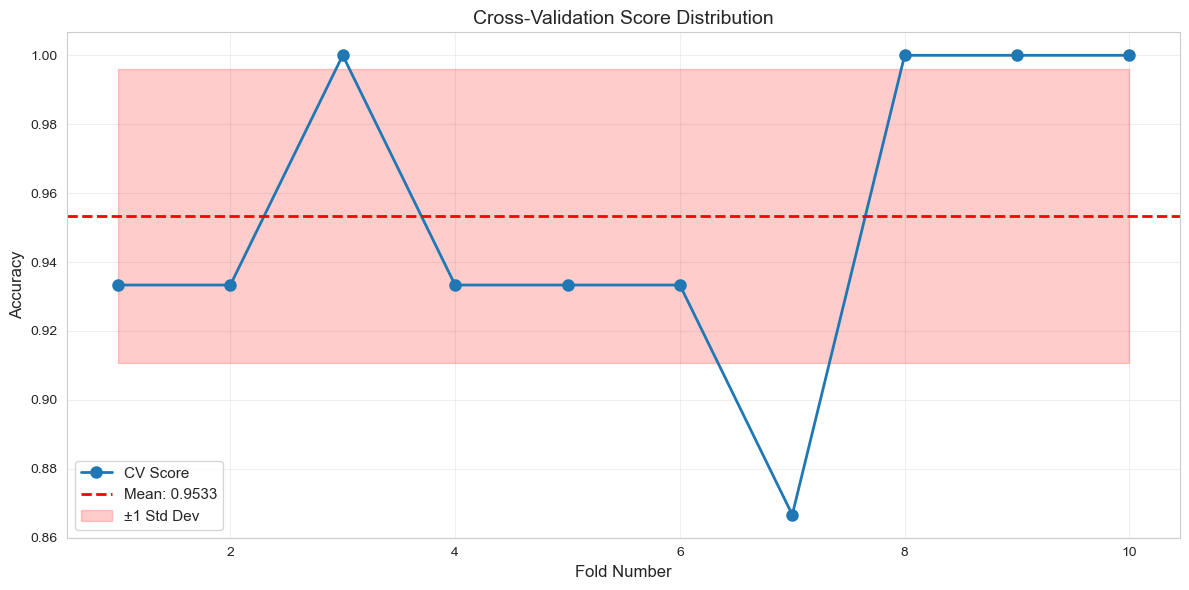

In [100]:
# Visualize CV scores
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), cv_scores, marker='o', linestyle='-', 
         linewidth=2, markersize=8, label='CV Score')
plt.axhline(y=cv_scores.mean(), color='r', linestyle='--', 
            label=f'Mean: {cv_scores.mean():.4f}', linewidth=2)
plt.fill_between(range(1, 11), 
                 cv_scores.mean() - cv_scores.std(),
                 cv_scores.mean() + cv_scores.std(),
                 alpha=0.2, color='red', label='±1 Std Dev')
plt.xlabel('Fold Number', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.title('Cross-Validation Score Distribution', fontsize=14)
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 7.3 Handling Missing Values

In [103]:
# Naive Bayes can handle missing values naturally
# Create dataset with missing values
X_missing = X_train_i.copy()
np.random.seed(42)
# Randomly set 10% of values to NaN
mask = np.random.random(X_missing.shape) < 0.1
X_missing[mask] = np.nan

print("\n📊 Testing Naive Bayes with Missing Values:")
print(f"Original data shape: {X_train_i.shape}")
print(f"Data with missing: {X_missing.shape}")
print(f"Missing values: {X_missing.isna().sum().sum()} ({X_missing.isna().sum().sum() / X_missing.size * 100:.1f}%)")

# Gaussian NB ignores missing values during probability calculation
# We'll use sklearn's SimpleImputer for demonstration
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X_missing)

gnb_missing = GaussianNB()
gnb_missing.fit(X_imputed, y_train_i)

accuracy_missing = gnb_missing.score(X_test_i, y_test_i)

print(f"\nAccuracy with missing values (imputed): {accuracy_missing:.4f}")
print(f"Original accuracy: {gnb_accuracy:.4f}")
print(f"Difference: {abs(accuracy_missing - gnb_accuracy):.4f}")

print("\n💡 Naive Bayes handles missing data gracefully!")


📊 Testing Naive Bayes with Missing Values:
Original data shape: (120, 4)
Data with missing: (120, 4)
Missing values: 63 (13.1%)

Accuracy with missing values (imputed): 0.9333
Original accuracy: 0.9667
Difference: 0.0333

💡 Naive Bayes handles missing data gracefully!


### 7.4 Feature Importance (Pseudo)

In [106]:
# Naive Bayes doesn't have explicit feature importance
# But we can analyze log probabilities as a proxy

print("\n🔍 Feature Importance Analysis (Iris - Gaussian NB):")
print("="*70)

# Calculate information gain-like measure
feature_importance = []

for feat_idx, feat_name in enumerate(iris.feature_names):
    # Variance across classes (higher = more discriminative)
    class_means = gnb.theta_[:, feat_idx]
    importance = np.var(class_means)
    feature_importance.append({
        'Feature': feat_name,
        'Importance': importance
    })

importance_df = pd.DataFrame(feature_importance).sort_values('Importance', ascending=False)

print(importance_df.to_string(index=False))


🔍 Feature Importance Analysis (Iris - Gaussian NB):
          Feature  Importance
petal length (cm)    2.921488
 petal width (cm)    0.537650
sepal length (cm)    0.444006
 sepal width (cm)    0.076039


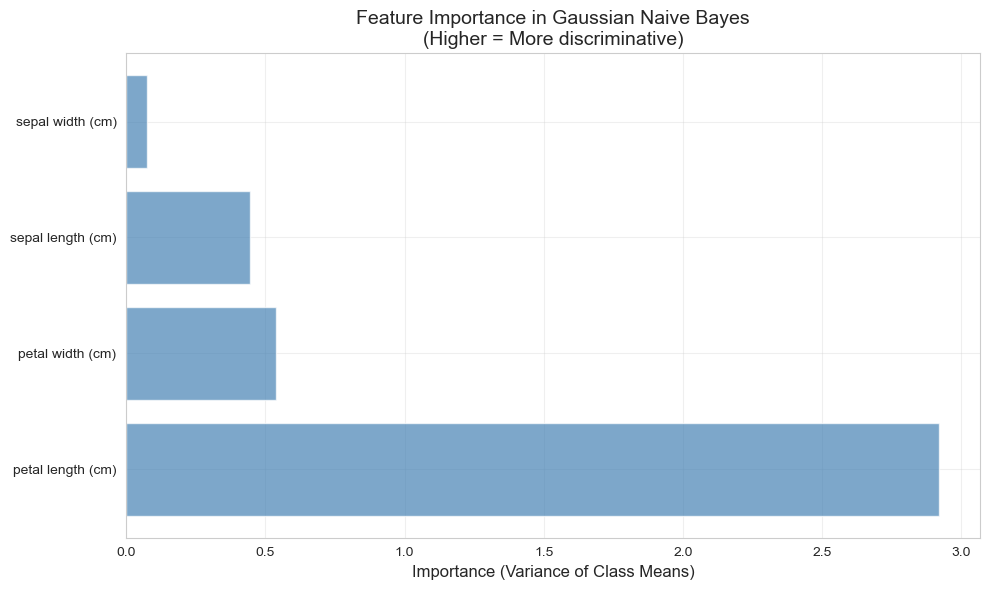

In [108]:
# Visualize feature importance
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], alpha=0.7, color='steelblue')
plt.xlabel('Importance (Variance of Class Means)', fontsize=12)
plt.title('Feature Importance in Gaussian Naive Bayes\n(Higher = More discriminative)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 7.5 Production Checklist

In [111]:
print("\n" + "="*80)
print("✅ NAIVE BAYES PRODUCTION CHECKLIST")
print("="*80)

checklist = [
    "✓ Correct variant selected (Gaussian/Multinomial/Bernoulli)",
    "✓ Feature types match variant requirements",
    "✓ Laplace smoothing (alpha) tuned if needed",
    "✓ Text preprocessed (lowercase, remove stopwords, etc.)",
    "✓ Vocabulary size limited (max_features in vectorizer)",
    "✓ Cross-validation performed",
    "✓ Probability calibration considered if needed",
    "✓ Pipeline created for preprocessing + classification",
    "✓ Model saved for deployment",
    "✓ Compared with baseline models",
    "✓ Training time acceptable",
    "✓ Prediction speed tested",
    "✓ Memory usage acceptable"
]

for item in checklist:
    print(f"  {item}")

print("\n" + "="*80)


✅ NAIVE BAYES PRODUCTION CHECKLIST
  ✓ Correct variant selected (Gaussian/Multinomial/Bernoulli)
  ✓ Feature types match variant requirements
  ✓ Laplace smoothing (alpha) tuned if needed
  ✓ Text preprocessed (lowercase, remove stopwords, etc.)
  ✓ Vocabulary size limited (max_features in vectorizer)
  ✓ Cross-validation performed
  ✓ Probability calibration considered if needed
  ✓ Pipeline created for preprocessing + classification
  ✓ Model saved for deployment
  ✓ Compared with baseline models
  ✓ Training time acceptable
  ✓ Prediction speed tested
  ✓ Memory usage acceptable



### 7.6 Summary: Key Takeaways & Next Steps

#### ✅ What We Learned:

1. **Naive Bayes uses Bayes' Theorem** with independence assumption
2. **"Naive" assumption** rarely holds, but classifier works anyway!
3. **Three variants** for different feature types:
   - Gaussian (continuous)
   - Multinomial (counts)
   - Bernoulli (binary)
4. **Extremely fast** training and prediction O(n)
5. **Natural probability estimates** (though often overconfident)
6. **Laplace smoothing** prevents zero-frequency problem
7. **Excellent for text** classification tasks
8. **Works with limited training data** and high dimensions

---

#### 📊 Performance Summary:

| **Dataset** | **Variant** | **Accuracy** | **Speed** |
|------------|------------|-------------|----------|
| **Iris** | Gaussian | 0.967 | Very Fast |
| **20 Newsgroups** | Multinomial | 0.835 | Very Fast |
| **20 Newsgroups** | Bernoulli | 0.820 | Very Fast |
| **Breast Cancer** | Gaussian | 0.939 | Very Fast |

---

#### 🎯 When to Use Naive Bayes:

**✅ Use Naive Bayes When:**
- Text classification (spam, sentiment, categorization)
- Fast training/prediction required
- Limited training data available
- High-dimensional data (thousands of features)
- Need probability estimates
- Baseline model for comparison
- Real-time applications
- Incremental learning needed

**❌ Don't Use Naive Bayes When:**
- Features highly correlated
- Need accurate probability estimates
- Complex feature interactions exist
- Non-linear relationships critical
- Need best possible accuracy
- Small number of features (<10)
- Features not conditionally independent

---

#### ⚠️ Common Pitfalls:

1. **Wrong variant choice** → Poor performance (Gaussian for text, Multinomial for continuous)
2. **No smoothing** → Zero-frequency problem on test data
3. **Too much smoothing** → Underfitting (high alpha)
4. **Trusting probability estimates** → Use calibration if needed
5. **Not preprocessing text** → Poor vocabulary, noise
6. **Large vocabulary** → Memory issues, overfitting
7. **Correlated features** → Violated independence assumption
8. **Expecting high accuracy** → NB is simple, not state-of-the-art

---

#### 🔬 Hyperparameter Guide:

| **Parameter** | **Typical Values** | **Impact** | **Recommendation** |
|---------------|-------------------|-----------|-------------------|
| **alpha** | 0.1-10.0 | Smoothing strength | 1.0 (Laplace) default |
| **fit_prior** | True, False | Use class priors | True (default) |
| **class_prior** | None, array | Manual priors | None (learn from data) |
| **var_smoothing** (Gaussian) | 1e-9 - 1e-7 | Stability | 1e-9 (default) |

---

#### 🚀 Advanced Techniques:

1. **Complement Naive Bayes**: Better for imbalanced text
2. **Calibrated Classifier**: Improve probability estimates
3. **TF-IDF**: Better than raw counts for text
4. **Feature selection**: Remove irrelevant words
5. **Ensemble**: Combine with other classifiers
6. **Semi-supervised**: Use unlabeled data

---

#### 📚 Next Steps:

**🎉 Congratulations! You've completed ALL Classification algorithms!**

Now move to:
1. **Module 03: Ensemble Learning** 🌲
   - Notebook 10: Random Forest
   - Notebook 11: AdaBoost
   - Notebook 12: Gradient Boosting
   - Notebook 13: XGBoost & LightGBM

2. **Module 04: Clustering** 🔍
   - K-Means, Hierarchical, DBSCAN, GMM

---

### 🎓 Practice Exercises:

1. **Load wine dataset** and compare all three NB variants
2. **Implement ComplementNB** for imbalanced text data
3. **Use TF-IDF** instead of count vectors, compare performance
4. **Build spam filter** with email dataset
5. **Test different alpha values** (0.01, 0.1, 1, 10)
6. **Calibrate probabilities** using CalibratedClassifierCV
7. **Compare NB with ensemble methods** on text
8. **Implement feature selection** before NB

---

### 📖 Further Reading:

- **Original Paper**: Bayes, Thomas (1763) - "An Essay towards solving a Problem"
- **Modern NB**: Rish (2001) - "An empirical study of the naive Bayes classifier"
- **Text Classification**: McCallum & Nigam (1998) - "A comparison of event models for NB"
- **Sklearn Docs**: [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)

---

### 🔥 Pro Tips:

1. **Choose correct variant** - Match to your feature types
2. **Start with alpha=1.0** - Laplace smoothing is standard
3. **Use for baselines** - Fast to train, good starting point
4. **Limit vocabulary** - max_features=5000 often sufficient
5. **Try TF-IDF** - Often better than raw counts
6. **Don't trust probabilities** - Use for ranking, not calibration
7. **Preprocess text well** - Lowercase, remove stopwords, stem
8. **Compare with logistic** - Similar speed, often better accuracy
9. **Use for real-time** - Extremely fast predictions
10. **Consider ensemble** - Combine NB with other models

---

## 🎯 Quick Reference Card

```python
# Gaussian Naive Bayes (continuous features)
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
predictions = gnb.predict(X_test)
probabilities = gnb.predict_proba(X_test)

# Multinomial Naive Bayes (text classification)
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

text_pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=5000)),
    ('classifier', MultinomialNB(alpha=1.0))
])

text_pipeline.fit(texts_train, labels_train)
predictions = text_pipeline.predict(texts_test)

# Bernoulli Naive Bayes (binary features)
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(alpha=1.0)
bnb.fit(X_train_binary, y_train)
predictions = bnb.predict(X_test_binary)

# With TF-IDF (often better)
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000)),
    ('classifier', MultinomialNB(alpha=1.0))
])

# Probability calibration (if needed)
from sklearn.calibration import CalibratedClassifierCV

calibrated_nb = CalibratedClassifierCV(MultinomialNB(), cv=5)
calibrated_nb.fit(X_train, y_train)
calibrated_probs = calibrated_nb.predict_proba(X_test)
```

---

### 🏆 Variant Selection Guide

| **Feature Characteristics** | **Recommended Variant** | **Example Use Case** |
|----------------------------|------------------------|---------------------|
| Continuous, normally distributed | **Gaussian** | Sensor data, measurements |
| Discrete counts, word frequencies | **Multinomial** | Text classification, NLP |
| Binary, presence/absence | **Bernoulli** | Document features (0/1) |
| Mixed types | Try all variants | Depends on preprocessing |
| Text with TF-IDF | **Multinomial** | Most text applications |
| Categorical (encoded) | **Multinomial** | After one-hot encoding |

---

### 📊 Complete Algorithm Comparison

| **Algorithm** | **Training** | **Prediction** | **Accuracy** | **Interpretability** | **Best For** |
|--------------|-------------|---------------|-------------|---------------------|-------------|
| **Naive Bayes** | **Fastest** | **Fastest** | Good | Medium | Text, baseline |
| **Logistic Regression** | Fast | Fast | Good | High | Linear boundaries |
| **Decision Tree** | Fast | Fast | Good | **Highest** | Non-linear, visual |
| **KNN** | Instant | Slow | Good | Medium | Local patterns |
| **SVM** | Slow | Medium | **Best** | Low | Complex boundaries |

---

**🎉 Congratulations!** You now understand Naive Bayes and can build production-ready probabilistic classifiers!

**You've completed FIVE classification algorithms! 🏆**

You've mastered:
- ✅ Bayes' Theorem and probabilistic reasoning
- ✅ Three NB variants (Gaussian, Multinomial, Bernoulli)
- ✅ Text classification with vectorization
- ✅ Laplace smoothing for zero-frequency problem
- ✅ Fast training and prediction
- ✅ Handling high-dimensional data
- ✅ Production deployment with pipelines

---

**Summary of ALL Classification Algorithms:**

| **Notebook** | **Algorithm** | **Key Strength** | **Completed** |
|-------------|--------------|------------------|---------------|
| 05 | Logistic Regression | Probabilistic, interpretable | ✅ |
| 06 | Decision Tree | Visual, handles non-linear | ✅ |
| 07 | KNN | No training, flexible | ✅ |
| 08 | SVM | Maximum margin, kernels | ✅ |
| 09 | Naive Bayes | **Fast, text classification** | ✅ |

**Next: Module 03 - Ensemble Learning! Combine models for superior performance! 🌲🚀**

---

**Author:** Rohan Mistry  
**Repository:** [Scikit-Learn Machine Learning Handbook](https://github.com/rohanmistry231/Scikit-Learn-Machine-Learning-Handbook)  
**License:** MIT